<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-DavRo24/blob/main/Nov/Clase%2004/Red%20Neuronal%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import glob
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline

In [11]:
#Los datos corresponden a un subset del dataset cats vs dogs de https://www.kaggle.com/c/dogs-vs-cats
files=glob.glob('/content/drive/MyDrive/Machine-Learning-2023/CATS_DOGS/train/*')

In [12]:
len(files)

4340

In [13]:
#numero de pixeles para nuestras imágenes.
num_px=64

In [14]:
train_x=[]
train_y=[]
for file in files[:250]:
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_x.append(data)
    img.close()
    if 'dog' in file:
        train_y.append(1)
    if 'cat' in file:
        train_y.append(0)
train_y=np.asarray(train_y)
train_x=np.asarray(train_x)

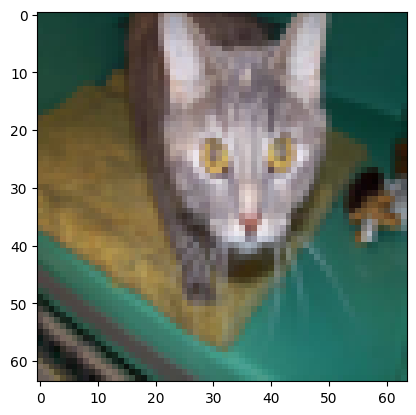

In [15]:
plt.imshow(train_x[0])

In [21]:
test_x=[]
test_y=[]
for file in files[4090:]:
    #print(file)
    img=Image.open(file)
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_x.append(data)
    img.close()
    if 'dog' in file:
        test_y.append(1)
    if 'cat' in file:
        test_y.append(0)
test_y=np.asarray(test_y)
test_x=np.asarray(test_x)

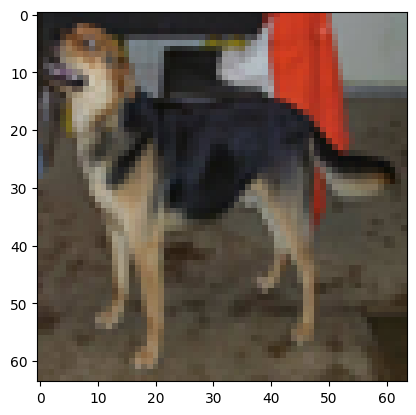

In [22]:
plt.imshow(test_x[1])

In [23]:
train_x_flatten = train_x.reshape(train_x.shape[0], -1).T

test_x_flatten = test_x.reshape(test_x.shape[0], -1).T

train_set_y=train_y.reshape((1,train_y.shape[0]))
test_set_y=test_y.reshape((1,test_y.shape[0]))

In [24]:
train_set_x= train_x_flatten/255
test_set_x= test_x_flatten/255

In [27]:
# Define la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Inicialización de parámetros
W = np.zeros((num_px * num_px * 3, 1))
b = 0

#Definir la función de costo: Implementa la función de costo de la regresión logística (puedes usar la entropía cruzada binaria):
def compute_cost(A, Y):
    m = Y.shape[1]
    return -1/m * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

# Hiperparámetros
learning_rate = 0.01
num_iterations = 4100
m = train_set_x.shape[1]


# Entrenamiento de regresión logística
for i in range(num_iterations):
    Z = np.dot(W.T, train_set_x) + b
    A = sigmoid(Z)

    # Calcula la función de costo
    cost = -1/m * np.sum(train_set_y * np.log(A) + (1 - train_set_y) * np.log(1 - A))

    # Calcula las derivadas
    dZ = A - train_set_y
    dW = 1/m * np.dot(train_set_x, dZ.T)
    db = 1/m * np.sum(dZ)

    # Actualiza los parámetros
    W = W - learning_rate * dW
    b = b - learning_rate * db

    if i % 100 == 0:
        print(f"Iteration {i}, Cost: {cost}")


Iteration 0, Cost: 0.6931471805599454
Iteration 100, Cost: 0.0003384750508372598
Iteration 200, Cost: 0.000297111911496562
Iteration 300, Cost: 0.00026518239804562883
Iteration 400, Cost: 0.00023973492419668326
Iteration 500, Cost: 0.00021894374154540037
Iteration 600, Cost: 0.00020161608278282853
Iteration 700, Cost: 0.0001869382435437213
Iteration 800, Cost: 0.0001743352477351822
Iteration 900, Cost: 0.00016338878727724265
Iteration 1000, Cost: 0.00015378695998161736
Iteration 1100, Cost: 0.00014529226455305778
Iteration 1200, Cost: 0.0001377205365799254
Iteration 1300, Cost: 0.0001309266851936919
Iteration 1400, Cost: 0.0001247947924871732
Iteration 1500, Cost: 0.00011923108997754223
Iteration 1600, Cost: 0.00011415887901559097
Iteration 1700, Cost: 0.00010951479332023978
Iteration 1800, Cost: 0.00010524600618639935
Iteration 1900, Cost: 0.00010130811425831311
Iteration 2000, Cost: 9.766351352207156e-05
Iteration 2100, Cost: 9.428013855022446e-05
Iteration 2200, Cost: 9.113047334006

In [28]:
# Evaluación del modelo en el conjunto de prueba
Z_test = np.dot(W.T, test_set_x) + b
A_test = sigmoid(Z_test)

In [29]:
# Aplicación de un umbral para obtener las predicciones
threshold = 0.5
predictions = (A_test > threshold).astype(int)

# Evaluar el rendimiento del modelo, por ejemplo, calculando la precisión
accuracy = np.mean(predictions == test_set_y)
print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.0
